In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import yfinance as yf 
import pandas_ta as ta  

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [19]:
#ML Modeling Packages 
import sklearn as sk 
import plotly.graph_objects as go
import tensorflow as tf 
import keras 

In [20]:
def getTicker():
    ticker = input('Input a stock ticker: (4 Chars)')
    if(len(ticker) < 4):
        print("Invalid Length\n")
        ticker = input("Input a stock ticker: ")
    return ticker.upper() 

In [21]:
ticker = yf.Ticker(getTicker())


In [22]:
from datetime import datetime
end_date = datetime.now().strftime('%Y-%m-%d')

# Retreive Stock History for a specified ticker
def getStockHistory():
    for i in range(3):
        if(i == 0):
            year = input("Year: ")
        elif(i == 1):
            month = input("Month: ")
        else:
            date = input("Date: ")
    start_date = "{}-{}-{}".format(year, month, date)
    return start_date 


In [23]:
start_date = getStockHistory()

ticker_hist = ticker.history(start=start_date, end=end_date)
print(ticker_hist)

                                 Open        High         Low       Close  \
Date                                                                        
2023-12-01 00:00:00-05:00  190.087448  191.315876  188.988844  190.996292   
2023-12-04 00:00:00-05:00  189.737886  189.807804  187.211111  189.188583   
2023-12-05 00:00:00-05:00  189.967607  194.152255  189.937631  193.173508   
2023-12-06 00:00:00-05:00  194.202196  194.511798  191.865182  192.074921   
2023-12-07 00:00:00-05:00  193.383247  194.751496  193.343289  194.022430   
2023-12-08 00:00:00-05:00  193.952501  195.740228  193.423178  195.460587   
2023-12-11 00:00:00-05:00  192.863905  193.243425  191.176056  192.933807   
2023-12-12 00:00:00-05:00  192.833941  194.471850  191.475673  194.461868   
2023-12-13 00:00:00-05:00  194.841365  197.747660  194.601681  197.707718   
2023-12-14 00:00:00-05:00  197.767647  199.365599  195.910017  197.857529   
2023-12-15 00:00:00-05:00  197.278264  198.147151  196.748941  197.318222   

In [24]:
# Relative Strength Index (RSI)
"""
This measures the speed of price changes and movement.
> Good indicator for short term buy and sell signals
> Oscillates between 0 and 100
> Overbought when over 70 and oversold when under 30.
"""

'\nThis measures the speed of price changes and movement.\n> Good indicator for short term buy and sell signals\n> Oscillates between 0 and 100\n> Overbought when over 70 and oversold when under 30.\n'

[*********************100%%**********************]  1 of 1 completed


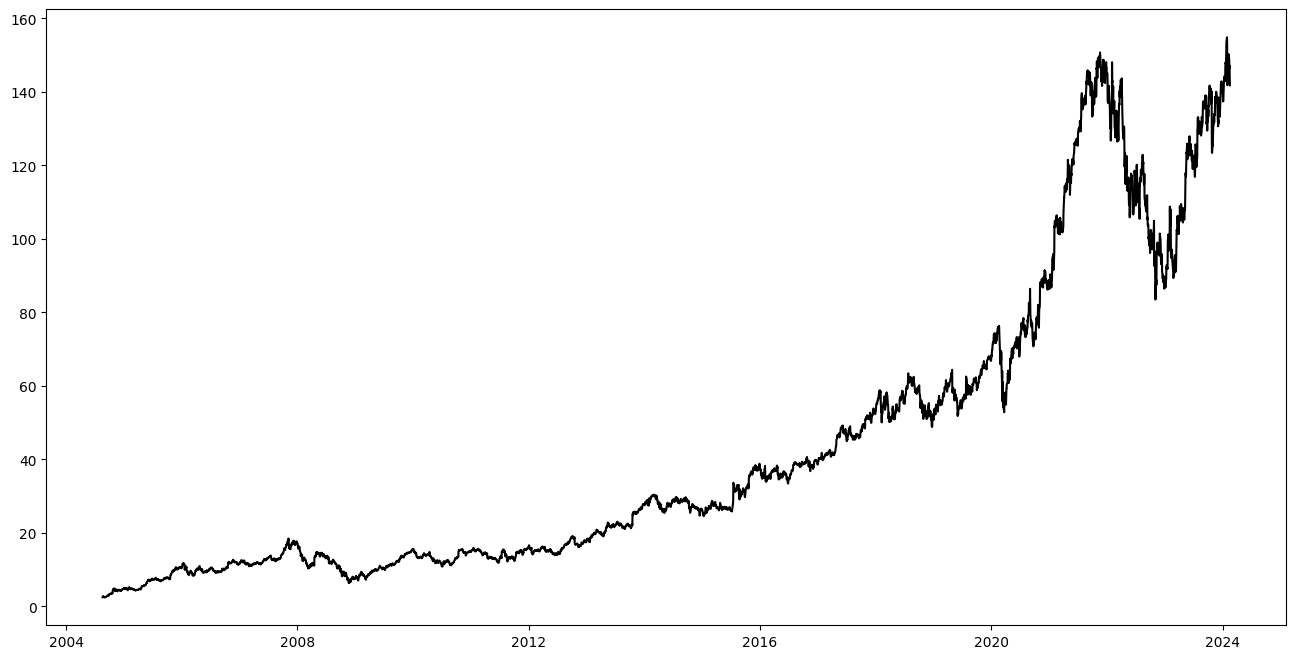

In [25]:
# Capture an entire df
data = yf.download(tickers="GOOG")
data

#Plotting 
plt.figure(figsize=(16,8))
plt.plot(data["Adj Close"], color="black", label="Price")

In [26]:
data['RSI']=ta.rsi(data.Close, length=15)
# length indicates X amount of days before the stock closed
data['EMAF']=ta.ema(data.Close, length=20)
data["EMAM"]=ta.ema(data.Close, length=100)
data["EMAS"]=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']=data.Open
data['Target'] = data['Target'].shift(-1)

#Binary Variable, telling us if the price went up or down
# AKA Classification Modeling
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

#Data Cleaning (Get Rid of NaNs)
data.dropna(inplace=True)
# inplace allows us to not readjust the data frame
data.reset_index(inplace=True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

/var/folders/g4/ykwfgyl55t7dfzv_zc3dcshh0000gn/T/ipykernel_9428/1346988300.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [27]:
dataset = data
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,4.432635,4.489173,4.432635,4.432635,43.007708,4.544757,4.373423,4.137123,4.500631,1,4.500631
1,4.500631,4.504616,4.463271,4.500631,43.416020,4.537115,4.375227,4.141459,4.525039,1,4.525039
2,4.525039,4.602748,4.506857,4.525039,46.703727,4.535348,4.378065,4.146454,4.509348,1,4.509348
3,4.509348,4.564890,4.435126,4.509348,44.349929,4.529361,4.379935,4.150772,4.499136,1,4.499136
4,4.499136,4.519311,4.473233,4.499136,45.743559,4.526032,4.382202,4.155324,4.432137,1,4.432137
...,...,...,...,...,...,...,...,...,...,...,...
4753,147.949997,150.695007,147.429993,147.949997,59.982277,146.418314,138.693696,134.847507,149.539993,1,149.539993
4754,149.539993,150.589996,148.559998,149.539993,56.540503,146.638474,138.892434,135.031381,146.070007,1,146.070007
4755,146.070007,148.039993,145.110001,146.070007,51.523416,146.612905,139.040505,135.181562,147.369995,1,147.369995
4756,147.369995,147.830002,145.554993,147.369995,52.981899,146.663104,139.200891,135.339951,144.460007,1,144.460007


In [28]:
#Neural Network, Standardization of Data, like STD, MinMax Scaling
#Scale all values we give the model, in between 0 and 1. 

# Step 1, Data Transormation on the Min-Max Scale
target_col = "TargetNextClose"

from sklearn.preprocessing import MinMaxScaler
sc_data = MinMaxScaler(feature_range=(0,1))
sc_response = MinMaxScaler(feature_range=(0,1))

response_scaled = sc_response.fit_transform(dataset[[target_col]])
# print(response_scaled)
# print(data_set.loc[:, data_set.columns != target_col])
# print(response_scaled)

# Locates all the columns which are NOT named our Target column
data_set_scaled = sc_data.fit_transform(dataset.loc[:, dataset.columns != target_col])
print(data_set_scaled.shape)

data_set_scaled_new = []
for i in range(len(data_set_scaled)):
    data_set_scaled_new.append([])

    data_set_scaled_new[i] = np.append(data_set_scaled[i], response_scaled[i])
    # print(data_set_scaled_new[i])

data_set_scaled_new =np.asarray(data_set_scaled_new)
print(data_set_scaled_new)

"""
What we did, transformed our data using tensorflow.
Next: Specify how bar back in the model we will look back, using portions of this new MinMax dataset, to predict some prices. 
--> Building the model, soon.
"""

(4758, 10)
[[3.32815299e-06 0.00000000e+00 5.53468672e-05 ... 4.57914321e-04
  0.00000000e+00 4.57914321e-04]
 [4.57914321e-04 1.02466749e-04 2.61658127e-04 ... 6.21095830e-04
  0.00000000e+00 6.21095830e-04]
 [6.21095830e-04 7.53595387e-04 5.55173777e-04 ... 5.16192065e-04
  0.00000000e+00 5.16192065e-04]
 ...
 [9.46917363e-01 9.52491775e-01 9.47405859e-01 ... 9.55608407e-01
  0.00000000e+00 9.55608407e-01]
 [9.55608407e-01 9.51098435e-01 9.50402528e-01 ... 9.36153733e-01
  0.00000000e+00 9.36153733e-01]
 [9.36153733e-01 9.30728251e-01 9.25654399e-01 ... 9.34482363e-01
  0.00000000e+00 9.34482363e-01]]


'\nWhat we did, transformed our data using tensorflow.\nNext: Specify how bar back in the model we will look back, using portions of this new MinMax dataset, to predict some prices. \n--> Building the model, soon.\n'

4
